# **Prediction using Unsupervised ML**

## **Author: Himanshu Khandelwal**

Given a dataset containing details of flower species based on sepal and petal lengths and widths, we are trying to find the optimum number of clusters for categorization of flower species and represent it visually.

Dataset: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

### **Importing libraries**

In [16]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Reading Data**

In [17]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We are not taking the Species column in our training data because that is the target variable we are trying to find.

In [63]:
X = data.iloc[:,:-1]
X.drop('Id',axis = 1, inplace =  True)

### **Implementing Model**

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

StandardScaler : Used to scale all columns so that all values are within a certain range.

In case of K Means Clustering, having all columns scaled is very useful and needed.

In [65]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
x = X_scaled.to_numpy()
X_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [66]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

### **Explanation:**



Within cluster sum of squares : Distance between the centroid and the points classified to a particular cluster.<br>
By trying to minimize this parameter, we eventually end up with the best possible location of centroids.

This method is called "Elbow Method"

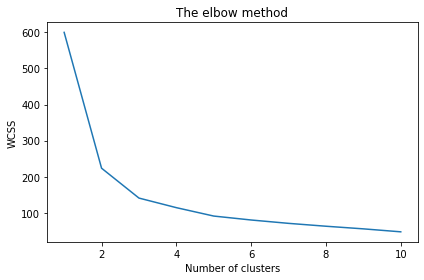

In [67]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [78]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [79]:
y = kmeans.predict(X_scaled)
y_df = pd.DataFrame(y,columns=['Class'])

We are combining the predictions with intial dataset to make a final dataset and using this for visualizations

In [75]:
final_data = pd.concat([X,y_df],axis=1) ## 
final_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


### **Visualizing Data**

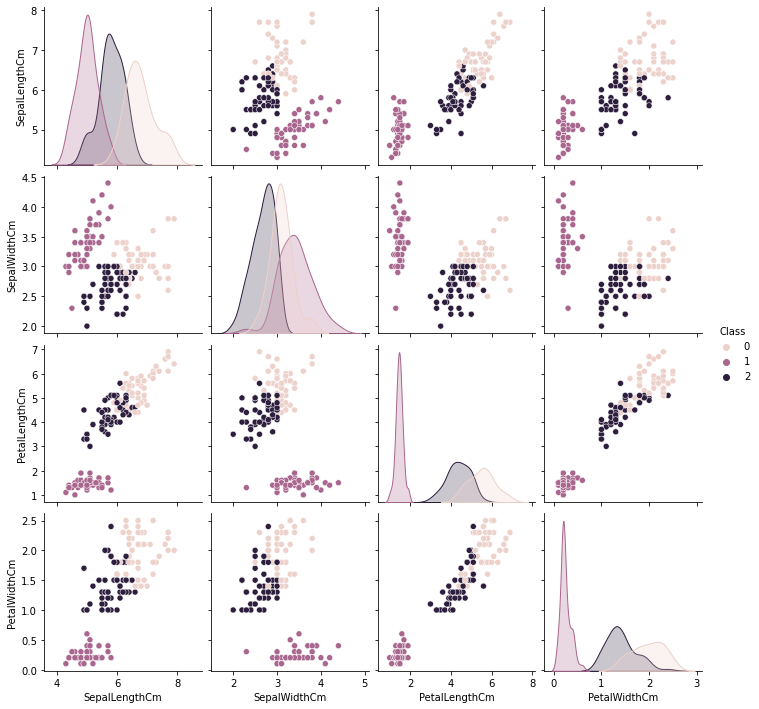

In [76]:
sns.pairplot(final_data,hue='Class')

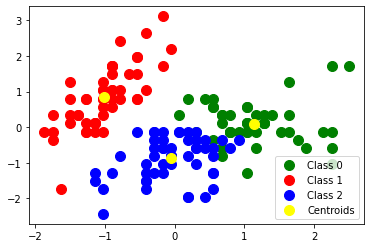

In [77]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 100, c = 'green', label = 'Class 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 100, c = 'red', label = 'Class 1')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 100, c = 'blue', label = 'Class 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()